# <font color='#31394d'>k-Means Clustering Practice Exercise</font>

In this notebook, we are going to apply clustering algorithm to identify homogenous groups of customers from the `mall_customer.csv` dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <font color='#31394d'>Import and Explore the Data</font>

In [2]:
df = pd.read_csv("./data/mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


🚀 <font color='#D9C4B1'>Exercise: </font> Explore your data. How large is it? Are there any missing values? What are the data types?

In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

🚀 <font color='#D9C4B1'>Exercise: </font> The income and spending score columns have pretty awkward names. Rename them as "AnnualIncome" and "SpendingScore", respectively.

In [7]:
# rename the income and spending score columns name to "AnnualIncome" and "Spendingscore" respectively
df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"}, inplace=True)

In [8]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


🚀 <font color='#D9C4B1'>Exercise: </font> Visualize the `Age` and `SpendingScore` distinguished by `Gender`.

In [10]:

# obtain rows whose gender is male
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

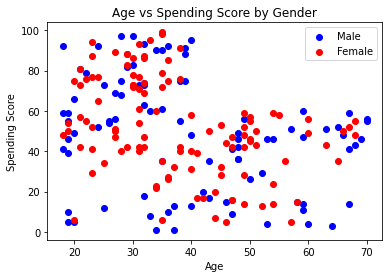

In [12]:
plt.scatter(male_df['Age'], male_df['SpendingScore'], color='blue', label='Male')
plt.scatter(female_df['Age'], female_df['SpendingScore'], color='red', label='Female')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score by Gender')
plt.legend()
plt.show()

### <font color='#31394d'> Apply k-Means Clustering </font>

Let's attempt to identify clusters based on Age and SpendingScore. Using two variables will allow us to visualize the results, but feel free to re-run this with all the continuous variables. K-means clustering is not suitable for categorical variables.

In [13]:
from sklearn.cluster import KMeans
X = df[['Age', 'SpendingScore']].values
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [14]:
df['cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


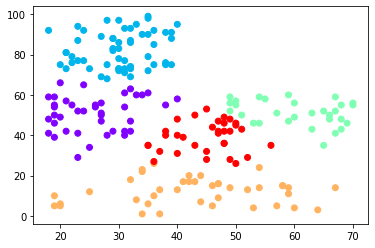

In [15]:
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow')

🚀 <font color='#D9C4B1'>Exercise: </font> Have a look at the help for `KMeans`. What do the "init" and "n_init" arguments do?

In [16]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='deprecated',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs='deprecated',
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives

The `init ` parameter determines the method for initializing the centroids. There are several methods available such as "k-means++", "random", and "ndarray". By default, `init=kmeans++`, which means that the algorithm will choose the initial centroids to be far apart from each other. 
The `n_init` parameter determines the number of times the algorithm will run with different initial centroids. The final results will be the best output of `n_init` consecutive runs in terms of inertia.

Let's perform k-Means clustering with k=4 (no particular reason, just as an example!)...

In [17]:
km = KMeans(n_clusters=4) # K = 4 
km.fit(df[['Age','SpendingScore']])

KMeans(n_clusters=4)

🚀 <font color='#D9C4B1'>Exercise: </font> What attributes does the `km` object have?

In [18]:
km?

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\ronle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an i

Let's have a look at cluster centroids:

In [19]:
pd.DataFrame(km.cluster_centers_, columns=['Age','SpendingScore'], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])

,Age,SpendingScore
Cluster1,55.708333,48.229167
Cluster2,30.175439,82.350877
Cluster3,43.291667,15.020833
Cluster4,27.617021,49.148936


Let's add a column with the predicted cluster label:

In [20]:
df['Cluster'] = km.labels_ + 1
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,cluster,Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,0,4


Let's visualize our clusters. Note that we can only do this because this is a toy example with two features (so we can plot them in a 2D space). If we had more than three features, we would not be able to visualize the clusters, but we could still examine the cluster centroids to determine what the clusters represent.

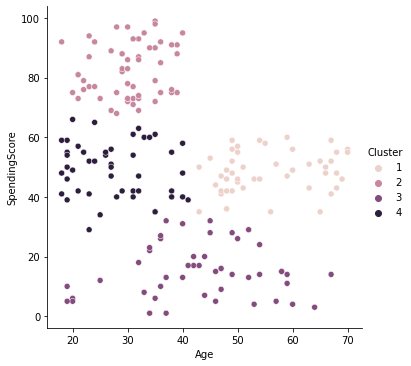

In [21]:
sns.relplot(x="Age", y="SpendingScore", data=df, hue="Cluster")

### <font color='#31394d'> Finding the Best k</font>

The `sklearn` `KMeans` method calls the total within-cluster variation "inertia". This is stored as the `inertia_` attribute of the fitted object. Next, we will loop over different values of k, store the inertia and choose the best value of k using the "elbow" method. 

In [25]:
# set the environment variable OMP_NUM_THREADS to 1
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [26]:
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df[['Age','SpendingScore']])
    inertia.append(estimator.inertia_)

c:\Users\ronle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
inertia

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23810.462233071372,
 19483.1179104427,
 15514.193134351033,
 13070.88815628816,
 11552.833430134675,
 10144.640781338223,
 9462.589708681015,
 8584.912533627226,
 7957.4561183261185,
 7352.385166347237,
 6678.812639635051,
 6052.586020420927,
 5535.69558701103,
 5283.19639976037,
 4805.5479797979815,
 4775.7385039667915]

<AxesSubplot:>

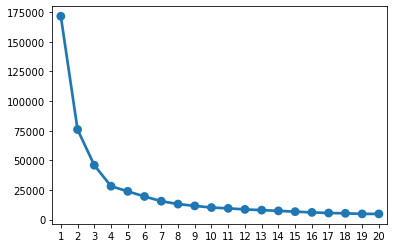

In [28]:
sns.pointplot(x=np.arange(1,21), y=inertia)

🚀 <font color='#D9C4B1'>Exercise: </font> How many clusters would you select? (There is no single "right" answer.)

`4` because the elbow is at 4